# Homework 0

**Name:** Omar Alejandro Guzmán Munguía

**e-mail:** omar.guzman5063@alumnos.udg.mx

# MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Theory on the Gradient Descent algorithm

### **Matyas function**

In this case, I am going to use the Matyas function, which is a commonly used function to evaluate optimization algorithms like Gradient Descent.

The first step is to define the function. This function will receive two parameters (x, y).

In [2]:
# Defining the Matyas function
def f_matyas(x, y):
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

Next, we need to define the gradient of the Matyas function.

In [3]:
# Defining the gradient of the Matyas function
def grad_f_matyas(x, y):
    grad_x = 0.52 * x - 0.48 * y
    grad_y = 0.52 * y - 0.48 * x
    return np.array([grad_x, grad_y])

### Gradient Descent Methodology

The Gradient Descent function requires four parameters to operate effectively. I am going to explain each one:
- **starting_point:** a tuple representing the initial coordinates (x, y) where the descent begins.
- **learning_rate:** a float that defines the step size, determining how much the parameters are updated in each iteration.
- **max_iterations:** an integer specifying the maximum number of iterations to prevent infinite loops.
- **convergence_treshold:** a float that sets the stopping condition, ensuring the process halts when updates become sufficiently small.

So, the Gradient Descent process is pretty straightforward once we have the right parameters.

First, we break down the starting point, which is a tuple, into `x and y` so we can use them individually. We also create an array to track the trajectory of the points as they move toward the minimum. Then, we loop through the specified number of `iterations`, calculating the gradient using `grad_f_matyas(x, y) `to determine the direction of movement. Using the learning rate, we update x and y, controlling the step size to ensure steady progress. Each updated value is stored to keep track of the descent. After every update, we check if the change in x and y is small enough to meet the `convergence threshold`, allowing us to stop early if we’re close to the minimum. Once the loop finishes, we return the optimized values along with the trajectory of updates

In [40]:
# Gradient Descent Algorithm
def gradient_descent(starting_point, learning_rate, max_iterations, convergence_threshold):
    x, y = starting_point
    history = []  # To store the trajectory of (x, y)

    for i in range(max_iterations):
        grad = grad_f_matyas(x, y)
        x_new = x - learning_rate * grad[0]
        y_new = y - learning_rate * grad[1]

        # Store the current point
        history.append((x, y))

        # Check for convergence
        if np.linalg.norm([x_new - x, y_new - y]) < convergence_threshold:
            print(f"Converged after {i} iterations.")
            break

        # Update (x, y)
        x, y = x_new, y_new

    return x, y, history

# Parameters
starting_point = (5, 5)  
learning_rate = 0.1
max_iterations = 1000
convergence_threshold = 1e-6

# Run Gradient Descent
x_min, y_min, history = gradient_descent(starting_point, learning_rate, max_iterations, convergence_threshold)

# Results
print(f"Local minimum found at: (x, y) = ({x_min}, {y_min})")
print(f"Function value at minimum: {f_matyas(x_min, y_min)}")


Local minimum found at: (x, y) = (0.09084654767794724, 0.09084654767794724)
Function value at minimum: 0.00033012380900006126


### Plot of Matyas function on the 2D plane

To visualize the trajectory of (x, y) using the Matyas function, we will use the values stored in `history`.
We will create a **contour plot** of the Matyas function and overlays the trajectory of the optimization path taken by `Gradient Descent`. 

- First we need to generate an evenly spaced, in this case I will generate 100 evenly spaced between -10 and 10 for both *x* and *y*.
- Next, we will create a 2D grid of *(x, y)* values. This part help us for evaluate the Matyas function over a 2D domain.
- *Z* will be a 2D array that containing the function values at each grid point.
- We will create a contour plot of the Matyas function using *X* and *Y* for the grid coordinates and *Z* as the function values at each grid point.
- Finally, we will plot the Optimization Trajectory using the `history` list.

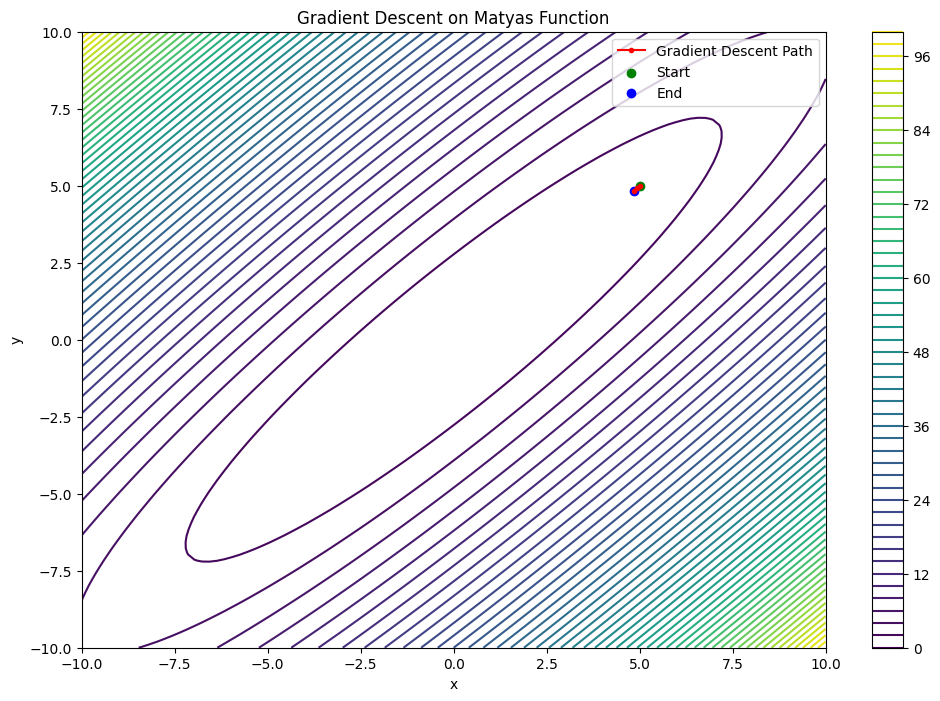

In [ ]:
# Create a grid of (x, y) values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f_matyas(X, Y)

# Plot the contour of the Matyas function
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar()

# Plot the optimization trajectory
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], 'r.-', label='Gradient Descent Path')
plt.scatter(history[0, 0], history[0, 1], color='green', label='Start')
plt.scatter(history[-1, 0], history[-1, 1], color='blue', label='End')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on Matyas Function')
plt.legend()
plt.show()

### Plot of Matyas function on the 3D plane

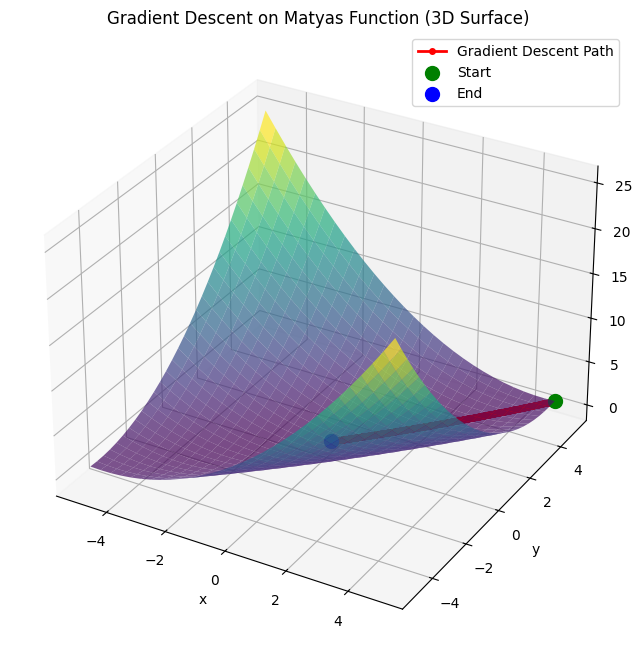

In [41]:
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x, y)

Z = f_matyas(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot the optimization trajectory (from history)
history = np.array(history)  
ax.plot(history[:, 0], history[:, 1], f_matyas(history[:, 0], history[:, 1]), 
        'r.-', label='Gradient Descent Path', linewidth=2, markersize=8)

# Mark the start and end points
ax.scatter(history[0, 0], history[0, 1], f_matyas(history[0, 0], history[0, 1]), 
           color='green', s=100, label='Start')
ax.scatter(history[-1, 0], history[-1, 1], f_matyas(history[-1, 0], history[-1, 1]), 
           color='blue', s=100, label='End')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Gradient Descent on Matyas Function (3D Surface)')

# Add a legend
ax.legend()

# Show the plot
plt.show()